In [1]:
# Insert all required imports here
import pandas as pd
import numpy as np

In [2]:
!pip install ggplot

In [3]:
from ggplot import *

/Users/lubovmckone/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/lubovmckone/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/lubovmckone/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:
# #import data here no longer needed due to pickle files. much faster
# yearend = pd.read_csv('yearend.csv')
# tr= pd.read_csv('tr.csv', engine='python')
# releases= pd.read_csv('releases.csv')
# admissions = pd.read_csv('admissions.csv', engine='python')

In [27]:
# #saving as pickle for faster loads
# yearend.to_pickle('yearend.pkl')
# tr.to_pickle('tr.pkl')
# releases.to_pickle('releases.pkl')
# admissions.to_pickle('admissions.pkl')

In [7]:
yearend =pd.read_pickle('yearend.pkl')
tr=pd.read_pickle('tr.pkl')
releases=pd.read_pickle('releases.pkl')
admissions=pd.read_pickle('admissions.pkl')

EOFError: 

In [5]:
#get counts of total inmates by state
yearend = yearend[['SEX', 'RPTYEAR', 'STATE', 'EDUCATION', 'ADMTYPE', 'OFFGENERAL','ADMITYR','SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT', 'AGEYREND','TIMESRVD_YREND']]
tr= tr[['ABT_INMATE_ID', 'SEX', 'ADMTYPE', 'OFFGENERAL', 'EDUCATION', 'ADMITYR','RELEASEYR','SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT', 'AGERELEASE', 'TIMESRVD','RELTYPE', 'STATE']]
admissions = admissions[['SEX', 'RPTYEAR', 'STATE', 'EDUCATION', 'ADMTYPE', 'OFFGENERAL','ADMITYR','SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT']]
releases = releases[['SEX', 'RPTYEAR', 'STATE', 'EDUCATION', 'ADMTYPE', 'OFFGENERAL','ADMITYR','SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT', 'RELYR', 'RELTYPE','AGERLSE', 'TIMESRVD_REL']]

total_by_state = tr.groupby('STATE')['ABT_INMATE_ID'].count()

In [6]:
#inmates that were over 55 when at the year's end
yearend_old = yearend[yearend['AGEYREND']==5]
yearend_old = yearend_old[['SEX', 'RPTYEAR', 'STATE', 'EDUCATION', 'ADMTYPE', 'OFFGENERAL','ADMITYR','SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT', 'AGEYREND','TIMESRVD_YREND']]

In [7]:
#inmates who were admitted after they were 55
admissions_old = admissions[admissions['AGEADMIT']==5]
admissions_old = admissions_old[['SEX', 'RPTYEAR', 'STATE', 'EDUCATION', 'ADMTYPE', 'OFFGENERAL','ADMITYR','SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT']]


In [10]:
def is_over_55(row):
    '''
    A function that determines whether an inmate is over 55 when they are released or, if
    they have not been released, determines whether they are currently over 55.
    
    input: a row of a dataframe. Can be passed to apply as a lambda function
    returns: boolean
    '''
    if (row['AGERELEASE']==' ') & (2014-row['ADMITYR']+(int(str(row['AGEADMIT']).ljust(2,'5'))+10)>55):
        return 1
    else:
        return 0

over55 = tr_old.apply(lambda row: is_over_55(row), axis=1)

In [12]:
tr['OVER55'] = over55

In [13]:
#inmates that were released when they were over 55 or inmates that have not yet been released and could be over 55
tr=tr[(tr['AGERELEASE']==5) | (tr['OVER55']==1)]
tr_old = tr_old[['ABT_INMATE_ID', 'SEX', 'ADMTYPE', 'OFFGENERAL', 'EDUCATION', 'ADMITYR','RELEASEYR','SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT', 'AGERELEASE', 'TIMESRVD','RELTYPE', 'STATE']]

In [14]:
#inmates that were released when they were over 55
releases_old=releases[releases['AGERLSE']==5]
releases_old = releases_old[['SEX', 'RPTYEAR', 'STATE', 'EDUCATION', 'ADMTYPE', 'OFFGENERAL','ADMITYR','SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT', 'RELYR', 'RELTYPE','AGERLSE', 'TIMESRVD_REL']]

In [13]:
releases_old.columns

Index(['SEX', 'RPTYEAR', 'STATE', 'EDUCATION', 'ADMTYPE', 'OFFGENERAL',
       'ADMITYR', 'SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT', 'RELYR',
       'RELTYPE', 'AGERLSE', 'TIMESRVD_REL'],
      dtype='object')

In [14]:
tr_old.columns

Index(['ABT_INMATE_ID', 'SEX', 'ADMTYPE', 'OFFGENERAL', 'EDUCATION', 'ADMITYR',
       'RELEASEYR', 'SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT', 'AGERELEASE',
       'TIMESRVD', 'RELTYPE', 'STATE'],
      dtype='object')

In [16]:
admissions_old.columns

Index(['SEX', 'RPTYEAR', 'STATE', 'EDUCATION', 'ADMTYPE', 'OFFGENERAL',
       'ADMITYR', 'SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT'],
      dtype='object')

In [15]:
yearend_old.columns

Index(['SEX', 'RPTYEAR', 'STATE', 'EDUCATION', 'ADMTYPE', 'OFFGENERAL',
       'ADMITYR', 'SENTLGTH', 'OFFDETAIL', 'RACE', 'AGEADMIT', 'AGEYREND',
       'TIMESRVD_YREND'],
      dtype='object')

In [15]:
#percentage old by state

total_by_state = tr.groupby('STATE')['ABT_INMATE_ID'].count()
old_by_state = tr_old.groupby('STATE')['ABT_INMATE_ID'].count()

pct_old = old_by_state/total_by_state
pct_old

STATE
1     0.039778
2     0.008294
4     0.022367
6     0.010521
8     0.021882
10    0.022672
11    0.047860
12    0.030699
13    0.013485
17    0.013446
18    0.015389
19    0.022132
20    0.057674
21    0.012615
23    0.063171
24    0.023673
25    0.079307
26    0.028643
27    0.010456
28    0.023722
29    0.017000
30    0.070779
31    0.020322
32    0.046950
33    0.069806
34    0.024532
35    0.042169
36    0.014457
37    0.015112
38    0.013691
39    0.057705
40    0.031977
41    0.047420
42    0.032473
44    0.008904
45    0.017382
46    0.019317
47    0.018179
48    0.029086
49    0.020420
53    0.023118
54    0.032876
55    0.023716
56    0.047192
Name: ABT_INMATE_ID, dtype: float64

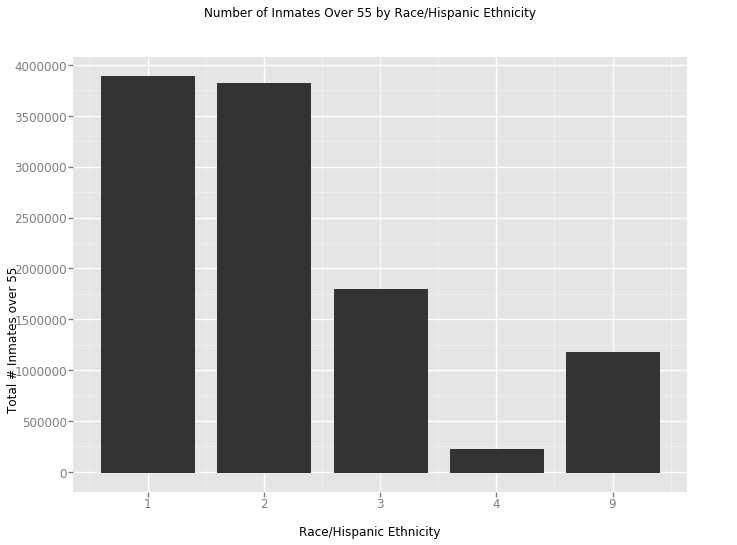

<ggplot: (148088273889)>

In [16]:
ggplot(aes('RACE'), data=tr) +\
geom_bar() +\
labs(x = "Race/Hispanic Ethnicity", y="Total # Inmates over 55", title = "Number of Inmates Over 55 by Race/Hispanic Ethnicity")

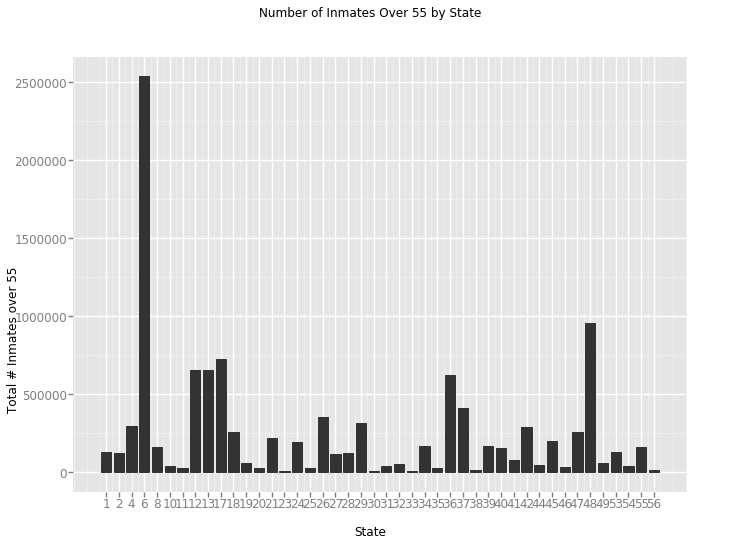

<ggplot: (-9223371888766502028)>

In [17]:
ggplot(aes('STATE'), data=tr) +\
geom_bar() +\
labs(x = "State", y="Total # Inmates over 55", title = "Number of Inmates Over 55 by State")